In [1]:
%load_ext autoreload
%autoreload 2
%pylab inline

%run ../include/preamble.py

Populating the interactive namespace from numpy and matplotlib


R[write to console]: essai de l'URL 'https://cloud.r-project.org/bin/macosx/contrib/4.1/spatstat_2.3-0.tgz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 3599148 bytes (3.4 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R


The downloaded binary packages are in
	/var/folders/r3/zcg_8chn0f94nyfhyj18j1240000gn/T//Rtmpt5bn3X/downloaded_packages


R[write to console]: essai de l'URL 'https://cloud.r-project.org/bin/macosx/contrib/4.1/spatstat.core_2.3-2.tgz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 6944502 bytes (6.6 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]


The downloaded binary packages are in
	/var/folders/r3/zcg_8chn0f94nyfhyj18j1240000gn/T//Rtmpt5bn3X/downloaded_packages


R[write to console]: essai de l'URL 'https://cloud.r-project.org/bin/macosx/contrib/4.1/spatstat.geom_2.3-1.tgz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 3999698 bytes (3.8 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]


The downloaded binary packages are in
	/var/folders/r3/zcg_8chn0f94nyfhyj18j1240000gn/T//Rtmpt5bn3X/downloaded_packages


# Generate a synthetic signal

For $\boldsymbol{x}$ a linear deterministic chirp, produce noisy observations following the model
$$
\boldsymbol{y} = \mathsf{snr} \times \boldsymbol{x} + \boldsymbol{\xi}
$$
with $\mathsf{snr}\geq 0$ the signal-to-noise ratio and $\boldsymbol{\xi}$ a complex white Gaussian noise.

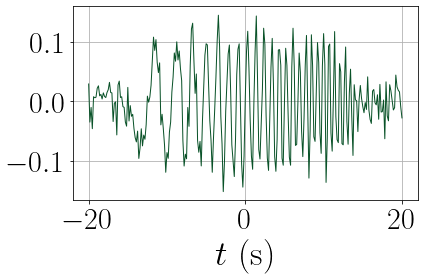

In [2]:
# number of points
N        = 256

# bound of the observation window
observe  = 20

# duration of the chirp
duration = 15

# signal-to-noise ratio
snr      = 2

# generate a synthetic signal corrupted by complex white Gaussian noise
nsignal, time_t = the_noisy_chirp(N,snr,observe,duration)

# display the real part of the signal
time_t = display_signal(nsignal,time_t)

# Kravchuk spectrogram

Compute the Kravchuk transform
$$
T\boldsymbol{y}(\vartheta, \varphi) =   \sum_{n = 0}^N \sqrt{\binom{N}{n}} \left( \cos \frac{\vartheta}{2} \right)^{n} \left( \sin \frac{\vartheta}{2} \right)^{N - n} \mathrm{e}^{ \mathrm{i} n \varphi } (\textbf{Q}\boldsymbol{y})[n],
$$
with $(\vartheta,\phi) \in [0,\pi]\times [0, 2\pi]$ the spherical coordinates and
$$
(\textbf{Q}\boldsymbol{y})[n] = \langle \boldsymbol{y}, \boldsymbol{q}_n \rangle= \sum_{\ell = 0}^N \overline{\boldsymbol{y}[\ell]} q_n(\ell;N) \quad
$$
the coefficients of $\boldsymbol{y}$ in the orthonormal basis of Kravchuk functions $\lbrace \boldsymbol{q}_n, n = 0, 1, \ldots, N \rbrace$.

In [3]:
# compute the transform
Ks     = the_transform(nsignal)

# find the zeros
zt, zp = the_zeros(Ks,N)

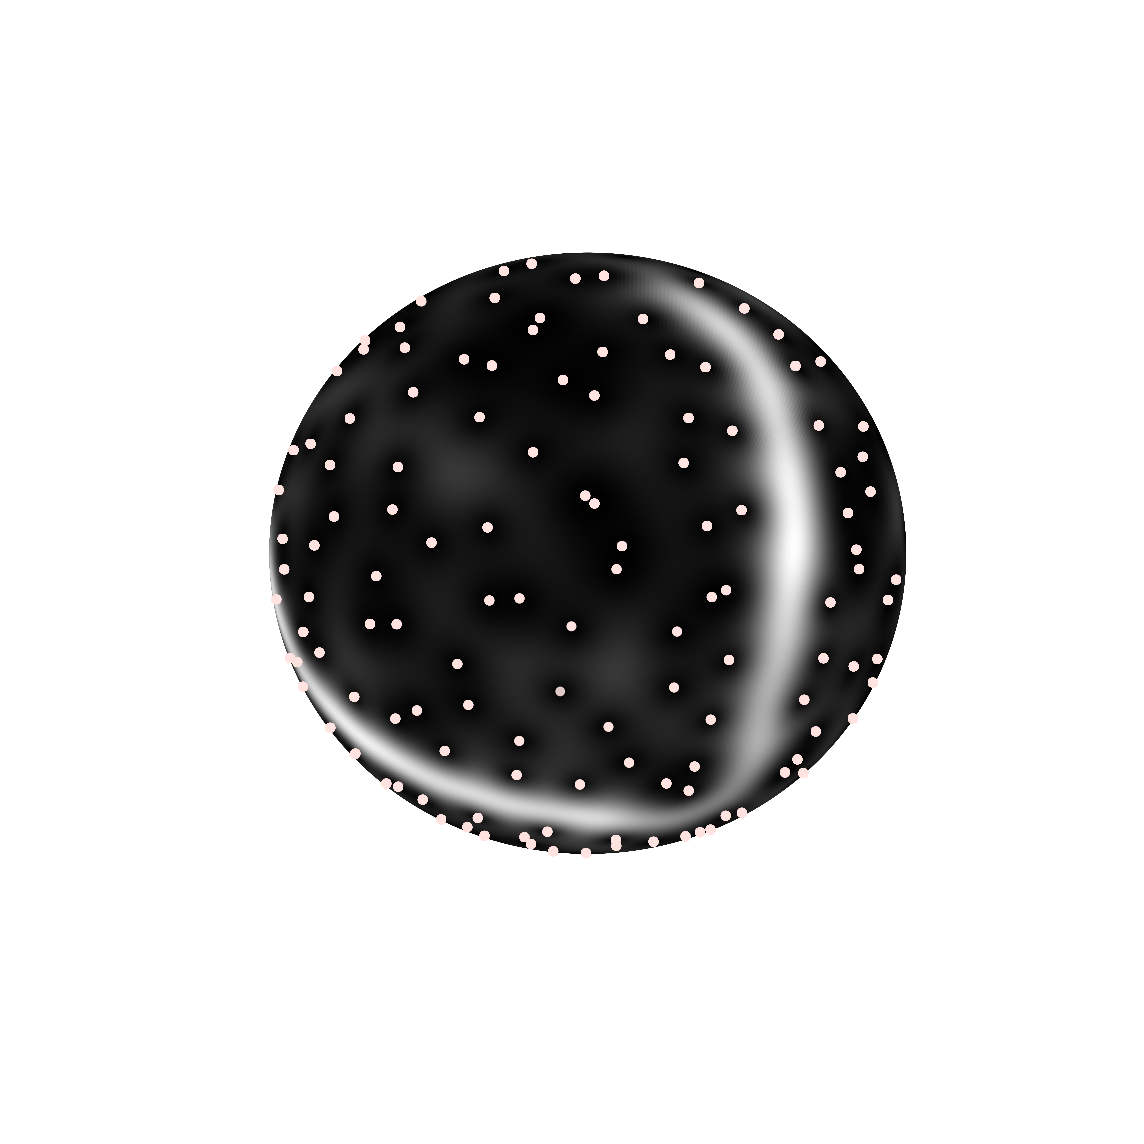

In [4]:
# display the Kravchuk spectrogram and its zeros on the sphere
if snr < inf:
    spherical_display(Ks,zt,zp)
else:
    spherical_display(Ks,[],[])

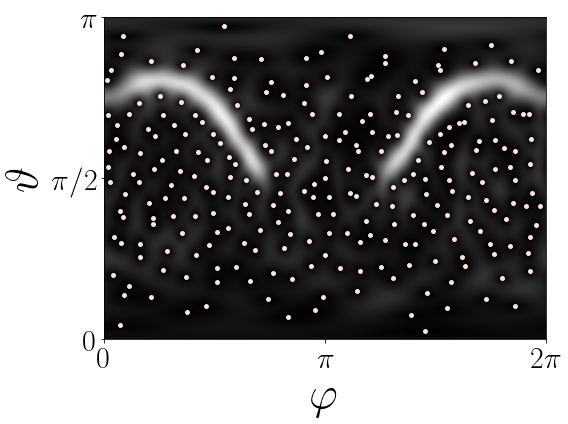

In [5]:
# unfolded representation
if snr < inf:
    planar_display(Ks,zt,zp)
else:
    planar_display(Ks,[],[])

# Comparison to standard time-frequency analysis

Let $g(t) = \pi^{-1/4} \mathrm{e}^{-t^2/2}$ the circular Gaussian window, the Gaussian spectrogram is the squared modulus of
$$
V_g y(t, \omega) = \int_{-\infty}^{\infty} \overline{y(u)} g(u - t) \mathrm{e}^{ -\mathrm{i}  \omega u } \, \mathrm{d}u.
$$

In [6]:
# compute the Short-Time Fourier 
Vs, fs          = the_stft_transform(nsignal, time_t)

# find the zeros
vt, vf          = the_stft_zeros(Vs,time_t,fs)

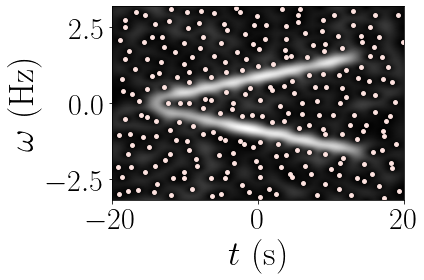

In [7]:
# display the standard spectrogram and its zeros in the time-frequency plane
if snr < inf:
    stft_display(Vs,time_t,fs,vt,vf)
else:
    stft_display(Vs,time_t,fs,[],[])